In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# The following allows to save plots in SVG format.
#import matplotlib_inline
#%matplotlib inline
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

## Read training data

In [2]:
def read_adjusted_history_ohlcv(path_csv):
    history = pd.read_csv(path_csv, parse_dates=["Date"], index_col='Date', \
        dtype={'Open': float, 'High': float, 'Low': float, 'Close': float,'Volume': float})
    history = history.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'})
    history.sort_index(inplace= True)
    history.dropna(inplace= True)
    history.drop_duplicates(inplace=True)
    return history

price_history = read_adjusted_history_ohlcv('yfinance/ibm.1d.adjusted.csv')
price_history

open        high         low       close  \
Date                                                                        
1962-01-02 00:00:00-05:00    1.543904    1.543904    1.526557    1.526557   
1962-01-03 00:00:00-05:00    1.526556    1.539900    1.526556    1.539900   
1962-01-04 00:00:00-05:00    1.539900    1.539900    1.523888    1.524555   
1962-01-05 00:00:00-05:00    1.522554    1.522554    1.491862    1.494531   
1962-01-08 00:00:00-05:00    1.493197    1.493197    1.454499    1.466509   
...                               ...         ...         ...         ...   
2024-05-13 00:00:00-04:00  167.500000  168.059998  166.759995  167.559998   
2024-05-14 00:00:00-04:00  167.860001  168.130005  166.479996  167.360001   
2024-05-15 00:00:00-04:00  167.940002  168.350006  167.339996  168.259995   
2024-05-16 00:00:00-04:00  168.259995  169.630005  167.789993  168.970001   
2024-05-17 00:00:00-04:00  168.970001  169.110001  167.330002  169.029999   

                                 volume  
Date                                     
1962-01-02 00:00:00-05:00  1.948437e+06  
1962-01-03 00:00:00-05:00  1.461328e+06  
1962-01-04 00:00:00-05:00  1.311448e+06  
1962-01-05 00:00:00-05:00  1.836027e+06  
1962-01-08 00:00:00-05:00  2.735306e+06  
...                                 ...  
2024-05-13 00:00:00-04:00  2.414900e+06  
2024-05-14 00:00:00-04:00  2.601000e+06  
2024-05-15 00:00:00-04:00  4.468800e+06  
2024-05-16 00:00:00-04:00  3.492300e+06  
2024-05-17 00:00:00-04:00  2.954100e+06  

[15700 rows x 5 columns]

## Make history small

In [3]:
price_history_tiny = price_history[:50]
price_history_tiny

open      high       low     close  \
Date                                                                
1962-01-02 00:00:00-05:00  1.543904  1.543904  1.526557  1.526557   
1962-01-03 00:00:00-05:00  1.526556  1.539900  1.526556  1.539900   
1962-01-04 00:00:00-05:00  1.539900  1.539900  1.523888  1.524555   
1962-01-05 00:00:00-05:00  1.522554  1.522554  1.491862  1.494531   
1962-01-08 00:00:00-05:00  1.493197  1.493197  1.454499  1.466509   
1962-01-09 00:00:00-05:00  1.473181  1.502538  1.473181  1.483856   
1962-01-10 00:00:00-05:00  1.486524  1.493196  1.486524  1.486524   
1962-01-11 00:00:00-05:00  1.490528  1.502538  1.490528  1.502538   
1962-01-12 00:00:00-05:00  1.505206  1.515882  1.505206  1.505206   
1962-01-15 00:00:00-05:00  1.510543  1.515214  1.510543  1.511878   
1962-01-16 00:00:00-05:00  1.510544  1.510544  1.495866  1.495866   
1962-01-17 00:00:00-05:00  1.489194  1.489194  1.467844  1.471847   
1962-01-18 00:00:00-05:00  1.475849  1.490527  1.475849  1.475849   
1962-01-19 00:00:00-05:00  1.475850  1.479853  1.459837  1.477184   
1962-01-22 00:00:00-05:00  1.477184  1.491863  1.473181  1.474516   
1962-01-23 00:00:00-05:00  1.473848  1.475850  1.457168  1.459837   
1962-01-24 00:00:00-05:00  1.459836  1.467843  1.452497  1.467843   
1962-01-25 00:00:00-05:00  1.467844  1.479854  1.449163  1.451831   
1962-01-26 00:00:00-05:00  1.451830  1.457168  1.443824  1.444491   
1962-01-29 00:00:00-05:00  1.444492  1.454500  1.419806  1.419806   
1962-01-30 00:00:00-05:00  1.419805  1.427811  1.401790  1.401790   
1962-01-31 00:00:00-05:00  1.415801  1.446492  1.415801  1.446492   
1962-02-01 00:00:00-05:00  1.461171  1.483856  1.461171  1.479852   
1962-02-02 00:00:00-05:00  1.479853  1.489194  1.473181  1.489194   
1962-02-05 00:00:00-05:00  1.489195  1.489195  1.462507  1.470513   
1962-02-06 00:00:00-05:00  1.470713  1.473382  1.465374  1.472047   
1962-02-07 00:00:00-05:00  1.473381  1.481389  1.473381  1.473381   
1962-02-08 00:00:00-05:00  1.473381  1.481389  1.473381  1.474716   
1962-02-09 00:00:00-05:00  1.474716  1.485393  1.468043  1.485393   
1962-02-12 00:00:00-05:00  1.485394  1.497405  1.484059  1.486728   
1962-02-13 00:00:00-05:00  1.486728  1.488062  1.462705  1.462705   
1962-02-14 00:00:00-05:00  1.462705  1.468043  1.457366  1.460036   
1962-02-15 00:00:00-05:00  1.460035  1.460035  1.453362  1.454697   
1962-02-16 00:00:00-05:00  1.454698  1.460036  1.453364  1.453364   
1962-02-19 00:00:00-05:00  1.453363  1.460036  1.436014  1.438683   
1962-02-20 00:00:00-05:00  1.439349  1.446689  1.439349  1.439349   
1962-02-21 00:00:00-05:00  1.439349  1.449359  1.428673  1.428673   
1962-02-23 00:00:00-05:00  1.430673  1.436012  1.430673  1.433343   
1962-02-26 00:00:00-05:00  1.433343  1.434678  1.425336  1.428005   
1962-02-27 00:00:00-05:00  1.428004  1.440016  1.419997  1.430673   
1962-02-28 00:00:00-05:00  1.430673  1.433343  1.422666  1.433343   
1962-03-01 00:00:00-05:00  1.438682  1.450693  1.438682  1.450693   
1962-03-02 00:00:00-05:00  1.462705  1.470713  1.462705  1.462705   
1962-03-05 00:00:00-05:00  1.462704  1.462704  1.452027  1.457366   
1962-03-06 00:00:00-05:00  1.457367  1.464040  1.454698  1.458701   
1962-03-07 00:00:00-05:00  1.458700  1.463371  1.454696  1.463371   
1962-03-08 00:00:00-05:00  1.463372  1.466709  1.454698  1.466709   
1962-03-09 00:00:00-05:00  1.468043  1.476050  1.468043  1.476050   
1962-03-12 00:00:00-05:00  1.476051  1.480054  1.470712  1.474716   
1962-03-13 00:00:00-05:00  1.474715  1.474715  1.468043  1.473381   

                                 volume  
Date                                     
1962-01-02 00:00:00-05:00  1.948437e+06  
1962-01-03 00:00:00-05:00  1.461328e+06  
1962-01-04 00:00:00-05:00  1.311448e+06  
1962-01-05 00:00:00-05:00  1.836027e+06  
1962-01-08 00:00:00-05:00  2.735306e+06  
1962-01-09 00:00:00-05:00  2.473016e+06  
1962-01-10 00:00:00-05:00  1.498798e+06  
1962-01-11 00:00:00-05:00  1.611207e+06  
1962-01-12 00:00:00-05

In [4]:
price_history_small = price_history[:150]
price_history_small

open      high       low     close  \
Date                                                                
1962-01-02 00:00:00-05:00  1.543904  1.543904  1.526557  1.526557   
1962-01-03 00:00:00-05:00  1.526556  1.539900  1.526556  1.539900   
1962-01-04 00:00:00-05:00  1.539900  1.539900  1.523888  1.524555   
1962-01-05 00:00:00-05:00  1.522554  1.522554  1.491862  1.494531   
1962-01-08 00:00:00-05:00  1.493197  1.493197  1.454499  1.466509   
...                             ...       ...       ...       ...   
1962-07-30 00:00:00-04:00  1.009772  1.034132  1.009772  1.034132   
1962-07-31 00:00:00-04:00  1.034132  1.050484  1.033131  1.033131   
1962-08-01 00:00:00-04:00  1.030462  1.030462  1.004433  1.004433   
1962-08-02 00:00:00-04:00  1.005101  1.029795  1.005101  1.029795   
1962-08-03 00:00:00-04:00  1.029794  1.034466  1.019783  1.027792   

                                 volume  
Date                                     
1962-01-02 00:00:00-05:00  1.948437e+06  
1962-01-03 00:00:00-05:00  1.461328e+06  
1962-01-04 00:00:00-05:00  1.311448e+06  
1962-01-05 00:00:00-05:00  1.836027e+06  
1962-01-08 00:00:00-05:00  2.735306e+06  
...                                 ...  
1962-07-30 00:00:00-04:00  1.423440e+07  
1962-07-31 00:00:00-04:00  1.385981e+07  
1962-08-01 00:00:00-04:00  6.105806e+06  
1962-08-02 00:00:00-04:00  7.454327e+06  
1962-08-03 00:00:00-04:00  4.757286e+06  

[150 rows x 5 columns]

## Candlesticks in raw Python

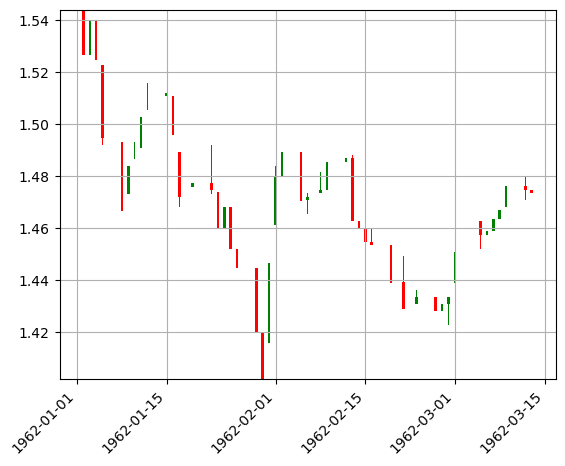

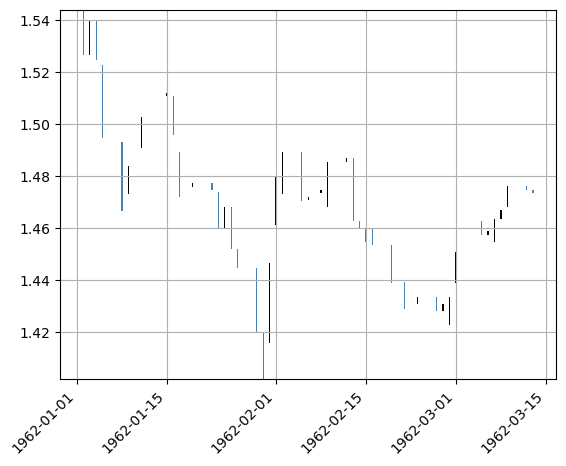

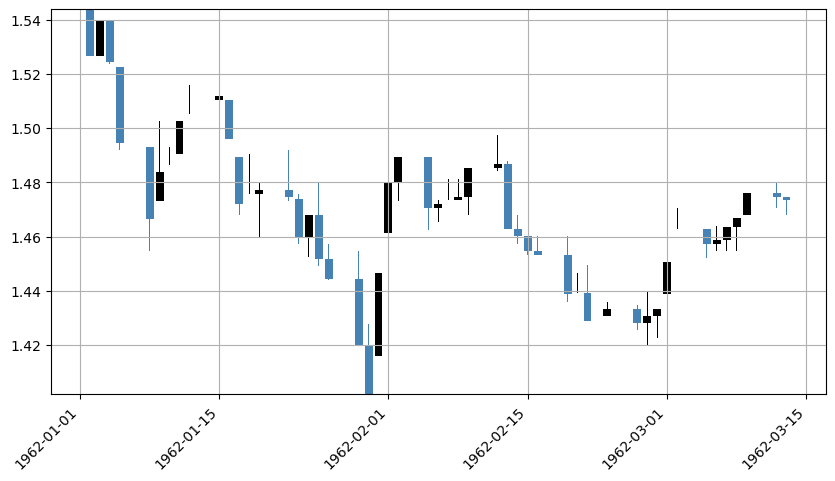

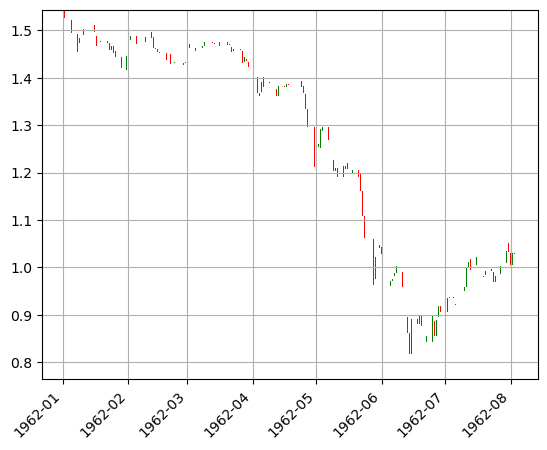

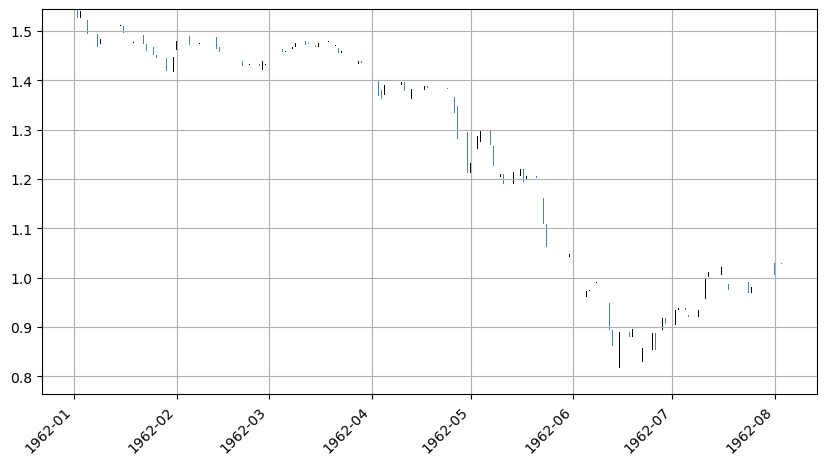

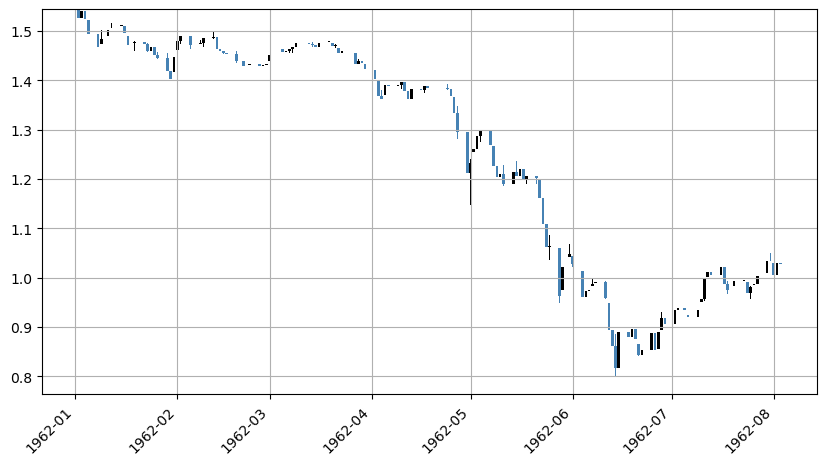

In [5]:
def  plot_candlesticks(df, body_width=.4, wick_width=.05, \
                       up_color='green', down_color='red', figsize=None):
    # up and down price movements
    up = df[df.close >= df.open]
    down = df[df.close < df.open]

    if figsize is None:
        plt.figure()
    else:
        plt.figure(figsize=figsize)
    #plt.style.use('ggplot')
    plt.grid(True)
    # plot up prices
    plt.bar(up.index, up.close - up.open, body_width, bottom=up.open, color=up_color)
    plt.bar(up.index, up.high - up.close, wick_width, bottom=up.close, color=up_color)
    plt.bar(up.index, up.low - up.open, wick_width, bottom=up.open, color=up_color)
    # plot down prices
    plt.bar(down.index, down.close - down.open, body_width, bottom=down.open, color=down_color)
    plt.bar(down.index, down.high - down.open, wick_width, bottom=down.open, color=down_color)
    plt.bar(down.index, down.low - down.close, wick_width, bottom=down.close, color=down_color)
    #rotate x-axis tick labels
    plt.xticks(rotation=45, ha='right')
    plt.show()

plot_candlesticks(price_history_tiny)
plot_candlesticks(price_history_tiny, body_width=.2, wick_width=.02, up_color='black', down_color='steelblue')
plot_candlesticks(price_history_tiny, body_width=.8, wick_width=.1, up_color='black', down_color='steelblue', figsize=(10, 5))

plot_candlesticks(price_history_small)
plot_candlesticks(price_history_small, body_width=.2, wick_width=.02, up_color='black', down_color='steelblue', figsize=(10, 5))
plot_candlesticks(price_history_small, body_width=.8, wick_width=.1, up_color='black', down_color='steelblue', figsize=(10, 5))


## Candlesticks in Plotly

In [6]:
import plotly.graph_objects as go
from datetime import datetime

def candlestick_plotly(df, rangeslider_visible=False):
    fig = go.Figure(data=[go.Candlestick(
                increasing_line_color= 'seagreen',
                decreasing_line_color= 'tomato',
                x=df.index,       #df.date or df['date']
                open=df.open,     #df.open or df['open']
                high=df.high,     #df.high or df['high']
                low=df.low,       #df.low or df['low']
                close=df.close)]) #df.close or df['close']
    fig.update_layout(xaxis_rangeslider_visible=rangeslider_visible)
    fig.show()

candlestick_plotly(price_history_tiny)
candlestick_plotly(price_history_small)
candlestick_plotly(price_history, rangeslider_visible=True)


## Candlesticks with MPLFinance

In [7]:
#!pip install mplfinance
import mplfinance as mpf
print("MPLFinance Version : {}".format(mpf.__version__))

MPLFinance Version : 0.12.10b0


Plotting Candlesticks using style : binance


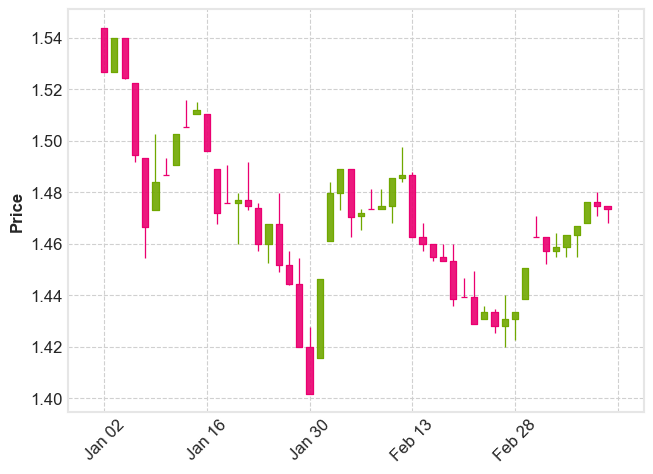

Plotting Candlesticks using style : binancedark


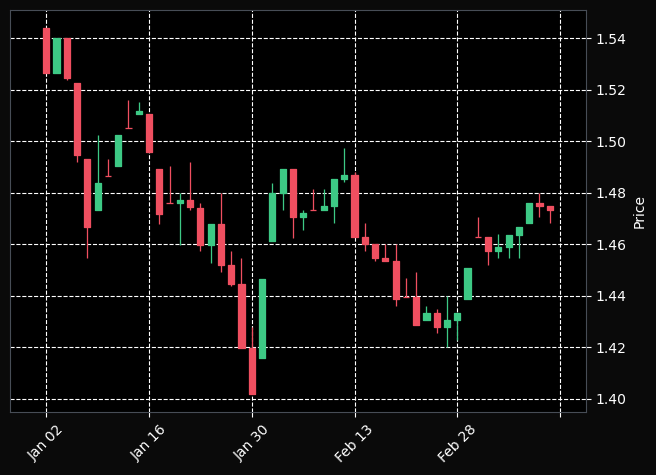

Plotting Candlesticks using style : blueskies


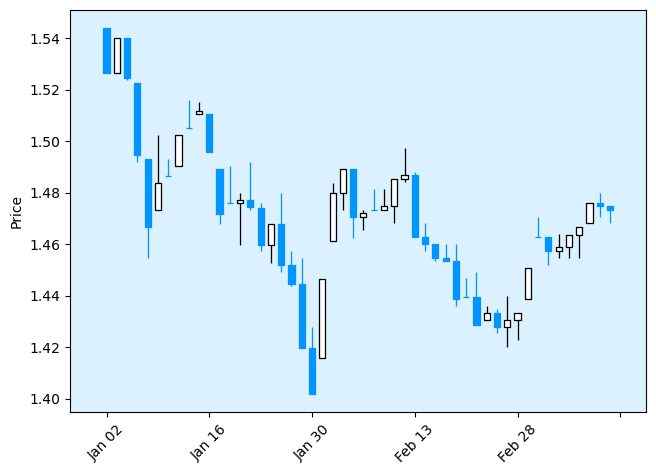

Plotting Candlesticks using style : brasil


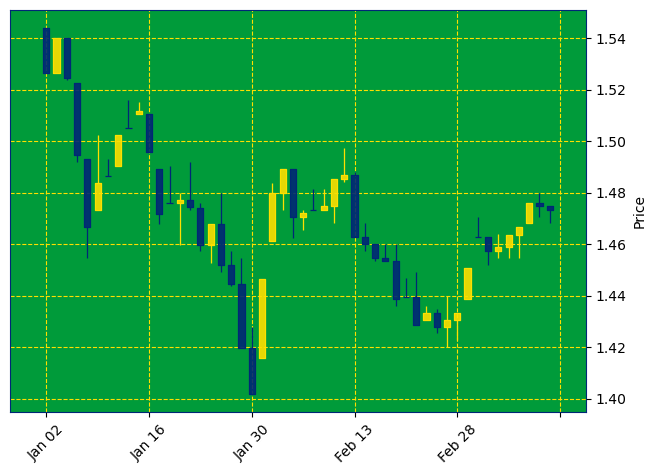

Plotting Candlesticks using style : charles


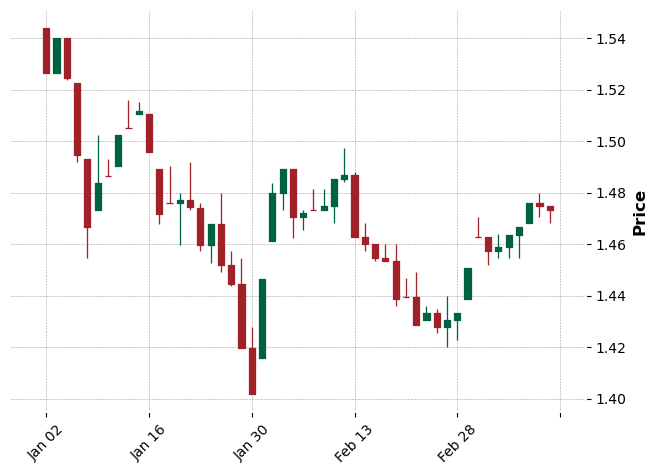

Plotting Candlesticks using style : checkers


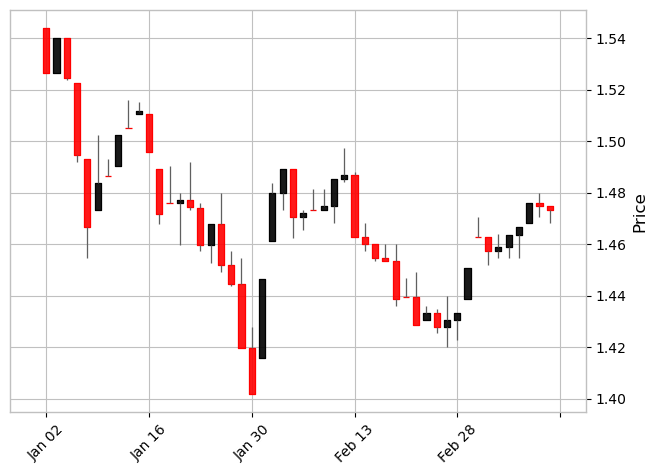

Plotting Candlesticks using style : classic


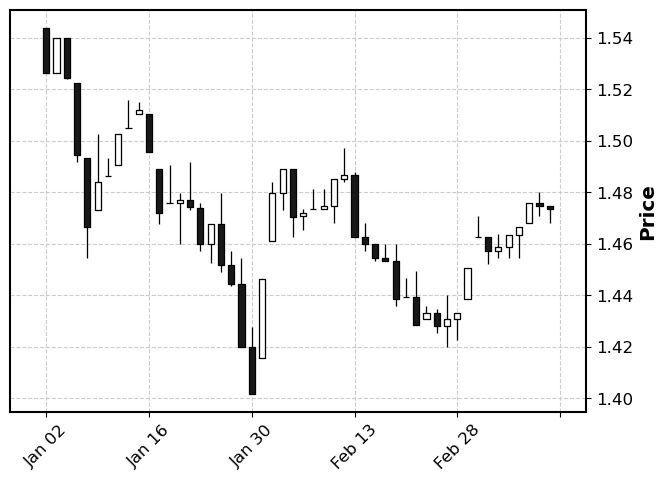

Plotting Candlesticks using style : default


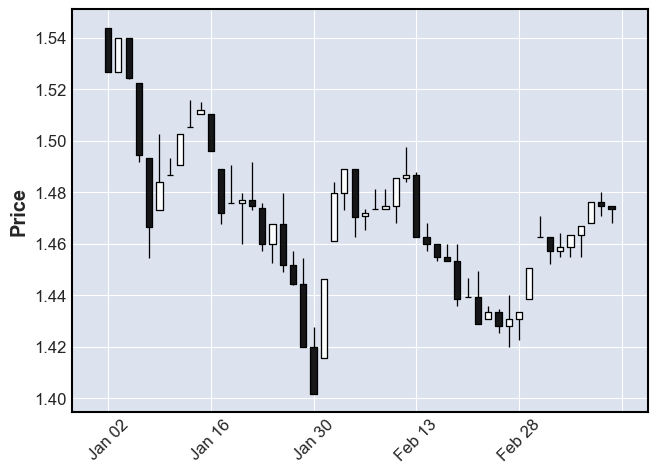

Plotting Candlesticks using style : ibd


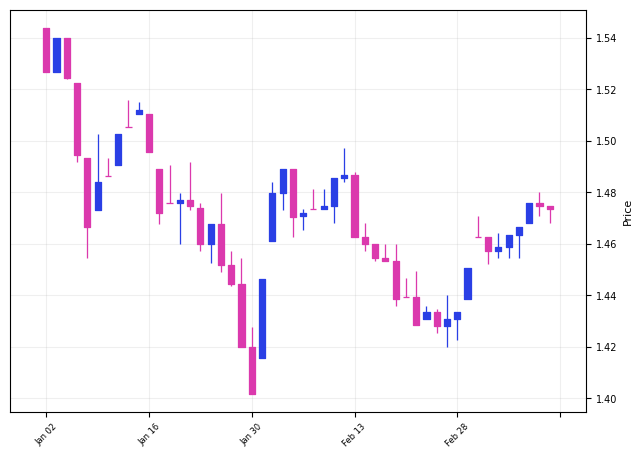

Plotting Candlesticks using style : kenan


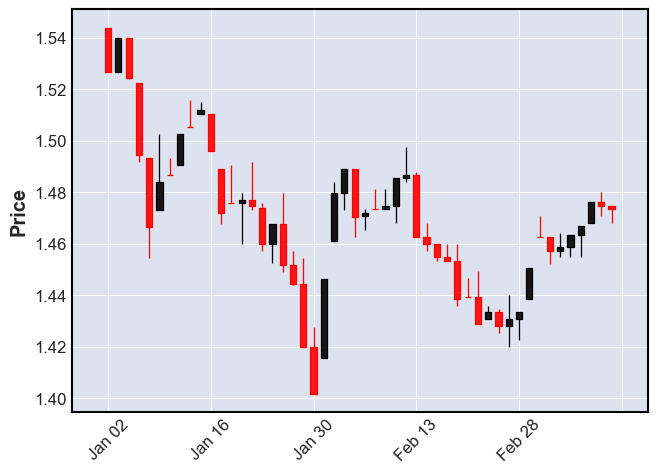

Plotting Candlesticks using style : mike


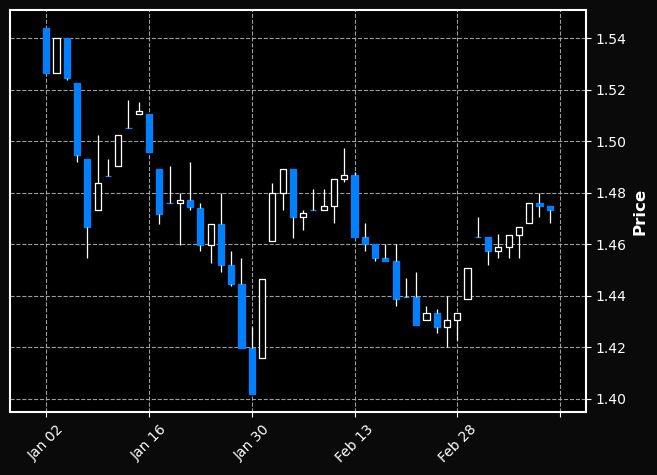

Plotting Candlesticks using style : nightclouds


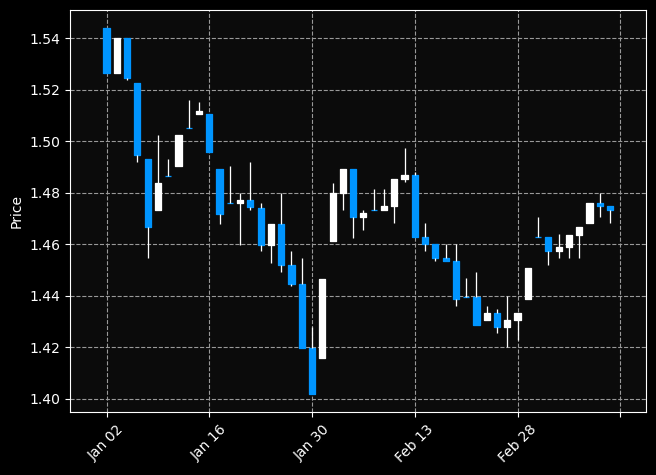

Plotting Candlesticks using style : sas


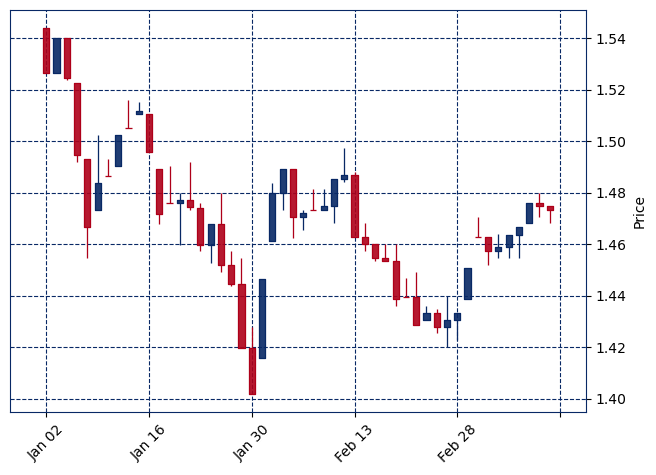

Plotting Candlesticks using style : starsandstripes


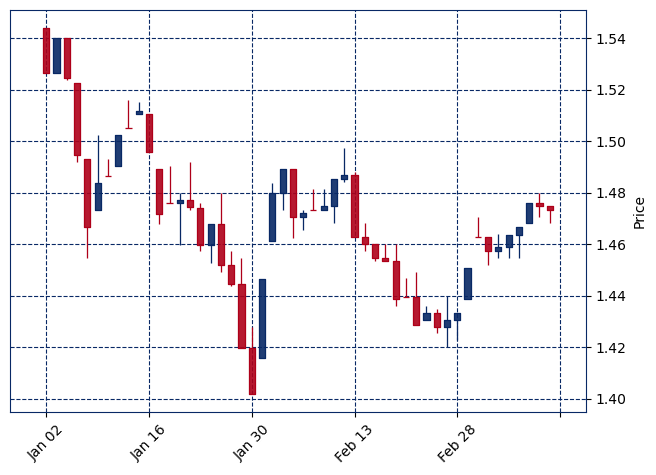

Plotting Candlesticks using style : tradingview


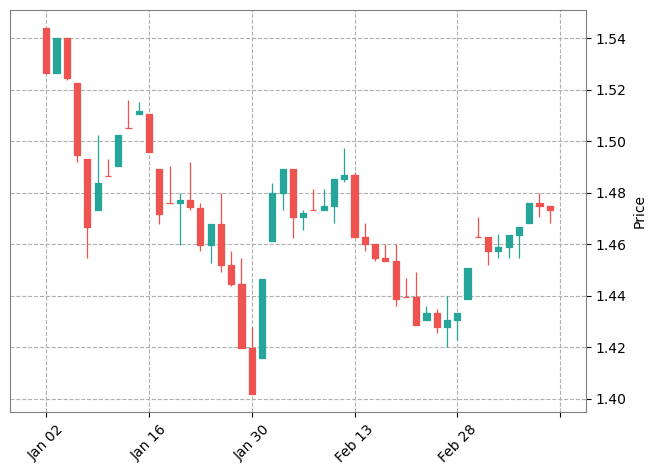

Plotting Candlesticks using style : yahoo


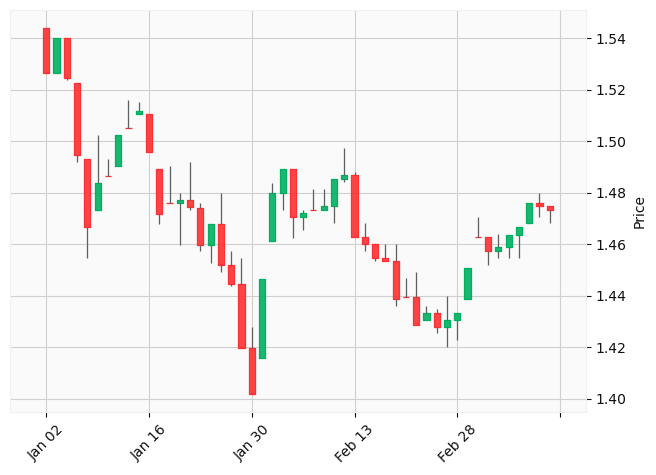

In [8]:
mpf_styles = mpf.available_styles()
#print("Candlestick Chart Styling from MPLFinance : {}".format(mpf_styles))

def plot_mplfinance_candlesticks(df, style='default', figsize=None):
    df = df.copy()
    df.index = pd.DatetimeIndex(df.index)
    #mpf.plot(df, type='candle', style=style, figratio=figsize)
    mpf.plot(df, type='candle', style=style)
    plt.show()

for style in mpf_styles:
    print("Plotting Candlesticks using style : {}".format(style))
    plot_mplfinance_candlesticks(price_history_tiny, style=style)


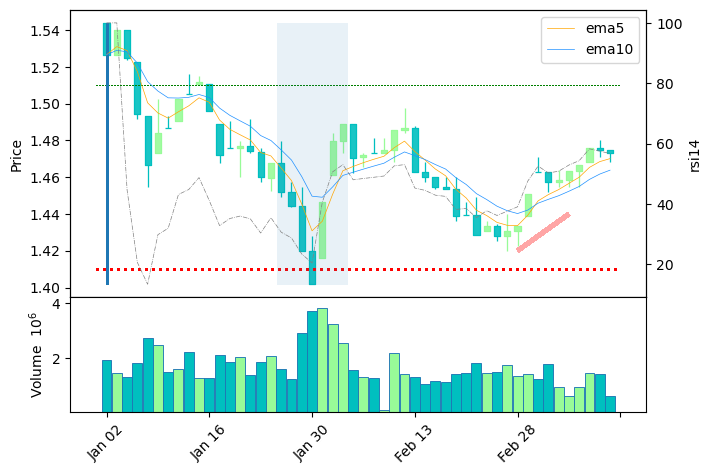

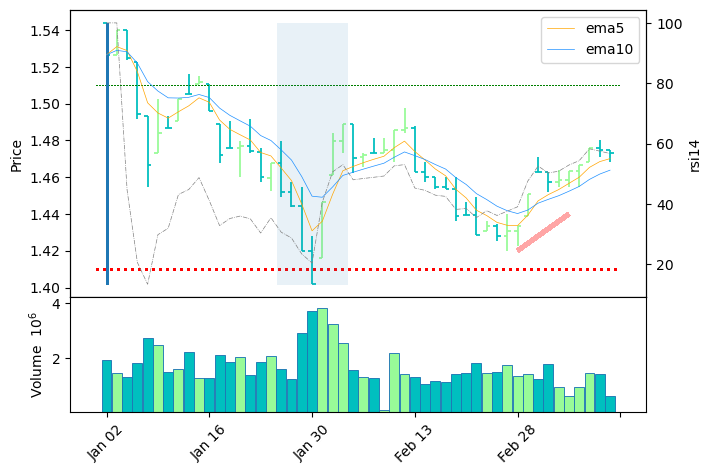

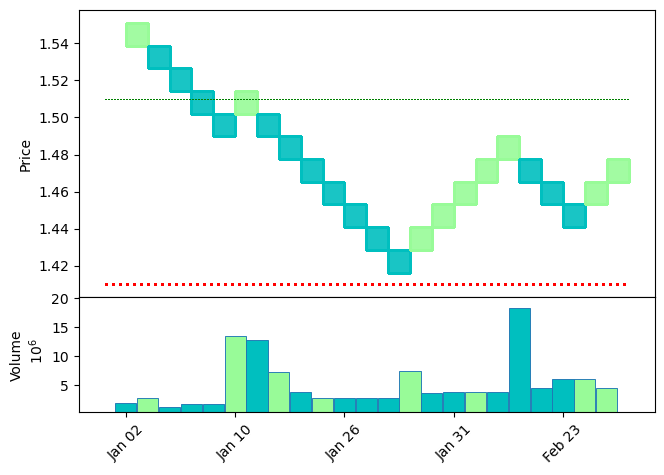

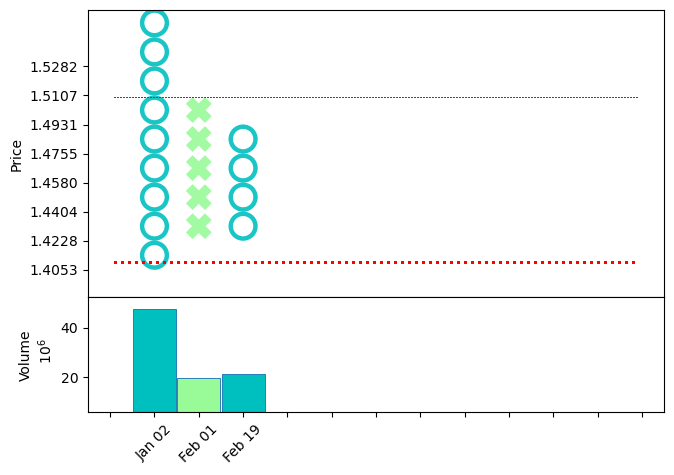

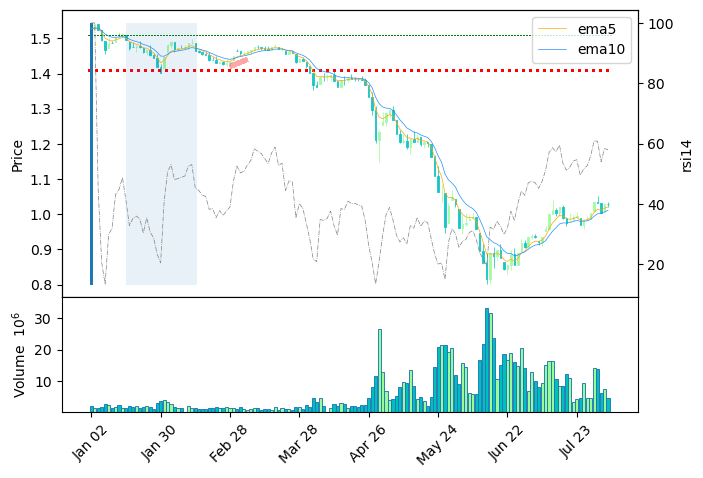

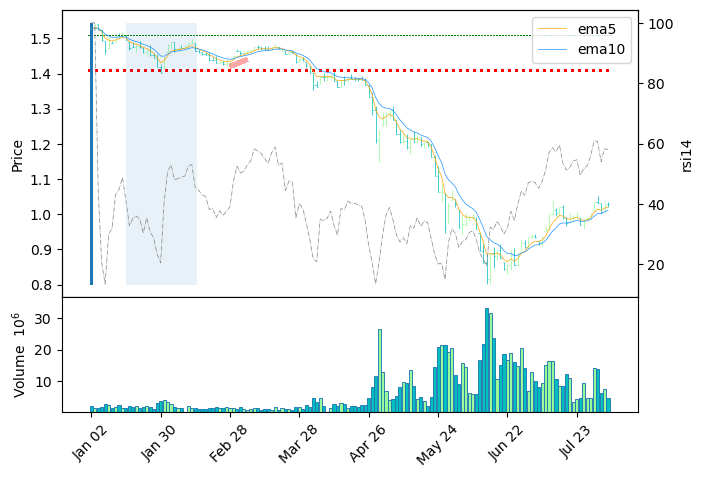

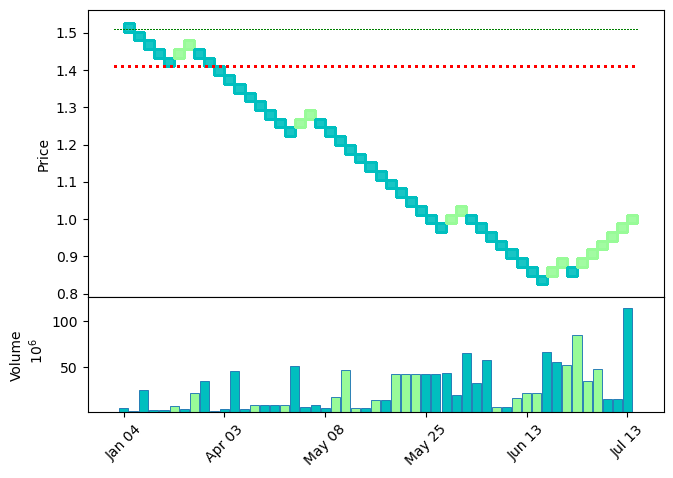

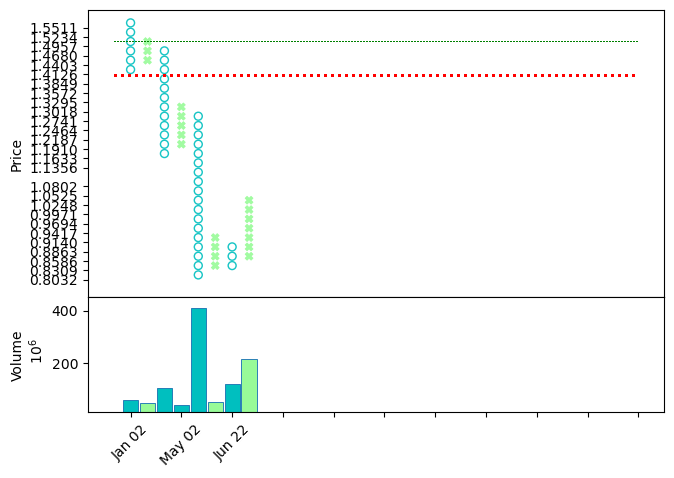

In [9]:
# see:
# https://github.com/matplotlib/mplfinance/tree/master/examples
# https://github.com/matplotlib/mplfinance/blob/master/examples/styles.ipynb
# https://github.com/matplotlib/mplfinance/blob/master/examples/using_lines.ipynb

import ta

def plot_mplfinance_candle_ohlc(df, style='default', ohlc=False):
    df = df.copy()
    df.index = pd.DatetimeIndex(pd.to_datetime(df.index, utc=True))
    
    df["ema5"] = ta.trend.ema_indicator(df.close, window=5, fillna=True)
    df["ema10"] = ta.trend.ema_indicator(df.close, window=10, fillna=True)
    df["rsi14"] = ta.momentum.rsi(df.close, window=14, fillna=True)
    ema5 = mpf.make_addplot(df["ema5"], label='ema5', color="orange", width=0.5)
    ema10 = mpf.make_addplot(df["ema10"], label='ema10', color="dodgerblue", width=0.5)
    # linestyles: 'solid', 'dotted', 'dashed', 'dashdot'
    rsi14 = mpf.make_addplot(df["rsi14"], color="grey", width=0.5, ylabel="rsi14", secondary_y=True, linestyle='dashdot')

    typ = 'candle'
    setup=dict(type='candle',volume=True)
    if ohlc:
        typ = 'ohlc'
        setup=dict(type='ohlc',volume=True)
    mpf.plot(df, style=style, #type=typ, # type='candle', 'line', 'ohlc', 'renko', 'pnf'
            hlines=dict(hlines=[1.51,1.41],colors=['g','r'],linestyle='dotted',linewidths=[.8,1.8]),
            vlines=dict(vlines=['1962-01-02','1962-01-30'],linewidths=[1,50],alpha=[1,0.1]),
            alines=dict(alines=[[('1962-02-28',1.42),('1962-03-07',1.44)]],linewidths=[3],colors=['r'],alpha=[0.35]),
            addplot=[ema5, ema10, rsi14],
            #figratio=(6, 4),
            #figscale=1.5,
            ylabel='Price',
            # title='IBM',
            #show_nontrading=True,
            #volume=True, ylabel_lower='Volume',
            #mav=(7, 21),
            #tight_layout=True,
            #savefig='mplfinance_candlesticks.svg',
            **setup
            )
    plt.show()

def plot_mplfinance_renko(df, style='default'):
    df = df.copy()
    df.index = pd.DatetimeIndex(pd.to_datetime(df.index, utc=True))
    mpf.plot(df, style=style, type='renko', # type='candle', 'line', 'ohlc', 'renko', 'pnf'
            hlines=dict(hlines=[1.51,1.41],colors=['g','r'],linestyle='dotted',linewidths=(.8,1.8)),
            #vlines=dict(vlines=['1962-01-02','1962-01-30'],linewidths=(1,50),alpha=[1,0.1]),
            #alines=dict(alines=[[('1962-02-28',1.42),('1962-03-07',1.44)]],linewidths=(3),colors=['r'],alpha=[0.35]),
            #figratio=(6, 4),
            #figscale=1.5,
            ylabel='Price',
            # title='IBM',
            #show_nontrading=True,
            volume=True, ylabel_lower='Volume',
            #tight_layout=True,
            #savefig='mplfinance_candlesticks.svg',
            )
    plt.show()

def plot_mplfinance_pnf(df, style='default'):
    df = df.copy()
    df.index = pd.DatetimeIndex(pd.to_datetime(df.index, utc=True))
    mpf.plot(df, style=style, type='pnf', # type='candle', 'line', 'ohlc', 'renko', 'pnf'
            hlines=dict(hlines=[1.51,1.41],colors=['g','r'],linestyle='dotted',linewidths=(.8,1.8)),
            #vlines=dict(vlines=['1962-01-02','1962-01-30'],linewidths=(1,50),alpha=[1,0.1]),
            #figratio=(6, 4),
            #figscale=1.5,
            ylabel='Price',
            # title='IBM',
            #show_nontrading=True,
            volume=True, ylabel_lower='Volume',
            #tight_layout=True,
            #savefig='mplfinance_candlesticks.svg',
            )
    plt.show()

mc = mpf.make_marketcolors(
    up='tab:green',down='tab:red',
    edge='white',
    wick={'up':'green','down':'red'},
    volume='steelblue',
    )
mc2 = mpf.make_marketcolors(
    up='palegreen',down='c',
    edge='inherit',
    wick='inherit',
    volume='inherit',
    ohlc='inherit',
    )
# 'default', 'ggplot', 'classic'
style = mpf.make_mpf_style(base_mpl_style='default', marketcolors=mc2, mavcolors=['skyblue', 'midnightblue'])
# 'nightclouds', 'starsandstripes', 'mike', 'blueskies', 'charles', 'classic', 'default', 'binance', 'ibd', 'yahoo'
#style = mpf.make_mpf_style(base_mpf_style='default', marketcolors=mc2, mavcolors=['skyblue', 'midnightblue'])
#style = 'default'

plot_mplfinance_candle_ohlc(price_history_tiny, style=style)
plot_mplfinance_candle_ohlc(price_history_tiny, style=style, ohlc=True)
plot_mplfinance_renko(price_history_tiny, style=style)
plot_mplfinance_pnf(price_history_tiny, style=style)

plot_mplfinance_candle_ohlc(price_history_small, style=style)
plot_mplfinance_candle_ohlc(price_history_small, style=style, ohlc=True)
plot_mplfinance_renko(price_history_small, style=style)
plot_mplfinance_pnf(price_history_small, style=style)